In [77]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

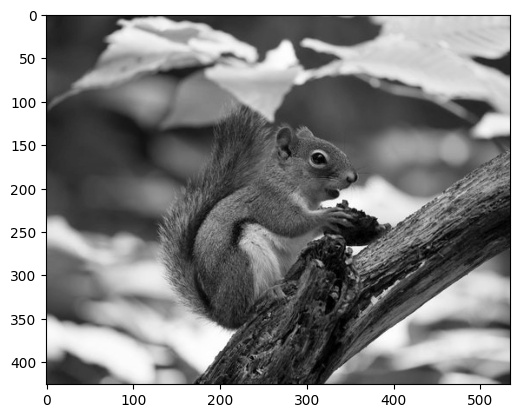

In [78]:
img = cv.imread(r"c:\Users\Ale Escallada\OneDrive\Documentos\imagenesPI2\squirrel_cls.jpg", 0)
sudoku = cv.imread(r"c:\Users\Ale Escallada\OneDrive\Documentos\imagenesPI2\sudoku.png", 0)
plt.imshow(img, "gray")

True

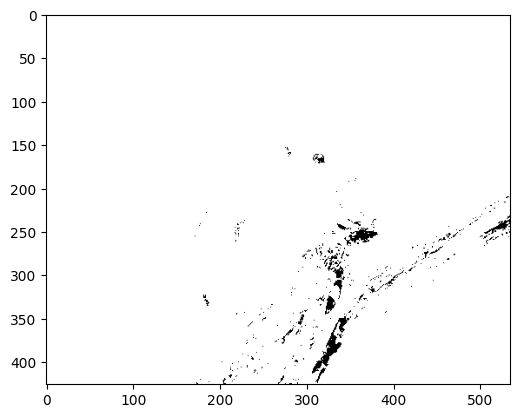

In [79]:
# Si UMBRAL > se oscurece (se vuelve negro)
# Si UMBRAL < se aclara (casi blanco)
UMBRAL = 10
img_bin = cv.threshold(img, UMBRAL, 255, cv.THRESH_BINARY)[1]
plt.imshow(img_bin, "gray")
cv.imwrite("umbral1.jpg", img_bin)

En este caso, nosotros escogemos el umbral, y para no hacerlo a mano ...

### OTSU thresholding

Técnica de OTSU adapta la umbralización

133.0


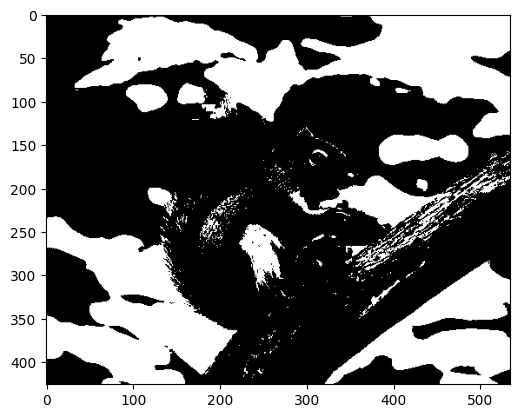

In [80]:
UMBRAL = 255
img_binO = cv.threshold(img, UMBRAL, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(img_binO[0])
plt.imshow(img_binO[1], "gray")

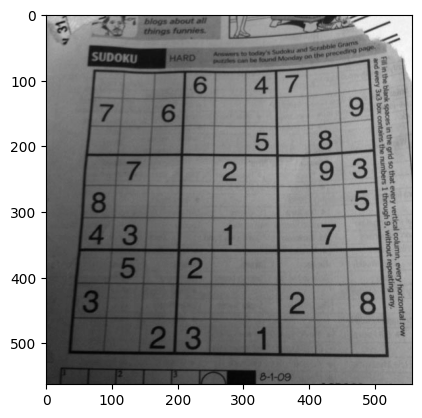

In [81]:
plt.imshow(sudoku, "gray")
cv.

96.0


True

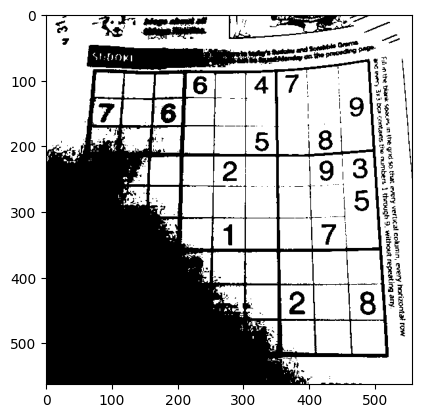

In [92]:
UMBRAL = 96
sudoku_bin = cv.threshold(sudoku, UMBRAL, 255, cv.THRESH_BINARY)
print(sudoku_bin[0])
plt.imshow(sudoku_bin[1], "gray")
cv.imwrite("sudokuOTSU.jpg", sudoku_bin[1])

### Adaptative thresholding

Separar imagen en bloquecitos para adaptar el mejor umbral a cada uno

True

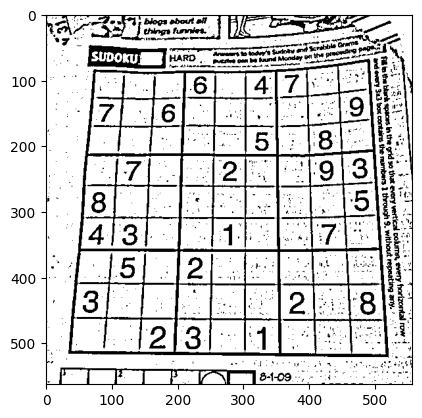

In [93]:
# Bloques 11x11
plt.imshow(cv.adaptiveThreshold(sudoku, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 4), "gray")
adaptive_sudoku = cv.adaptiveThreshold(sudoku, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 4)
cv.imwrite("adaptive_sudoku.jpg", adaptive_sudoku)

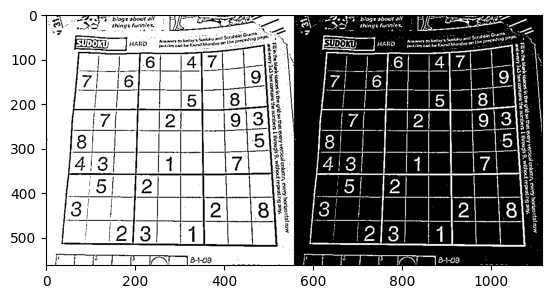

In [84]:
# Bloques 11x11
# Por cada bloque obtener un umbral
plt.imshow(np.hstack((cv.adaptiveThreshold(sudoku, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 7), 
                      cv.adaptiveThreshold(sudoku, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 7))), "gray")

### Componentes conectados

In [85]:
sudoku_bin_adapt = cv.adaptiveThreshold(sudoku, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 7)

In [86]:
output = cv.connectedComponentsWithStats(sudoku_bin_adapt)

In [87]:
len(output)

4

In [88]:
(numLabels, labels, stats, centroids) = output

In [89]:
numLabels

115

In [90]:
for i in range(1, numLabels):
    # Coordenadas
    x = stats[i, cv.CC_STAT_LEFT]
    y = stats[i, cv.CC_STAT_TOP]
    w = stats[i, cv.CC_STAT_WIDTH]
    h = stats[i, cv.CC_STAT_HEIGHT]
    a = stats[i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    copia = sudoku_bin_adapt.copy()
    cv.rectangle(copia, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv.circle(copia, (int(cX), int(cY)), 4, (0, 0, 255), -1)

In [91]:

#plt.imshow(output, "gray")